<a href="https://colab.research.google.com/github/psychpraphool/Artificial-Intelligence-and-Machine-Learning-6CS012-Assignment-I-Code-/blob/main/Assignment%20-%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - I**
By: Parakram KC, Pratik Shrestha, Biplav Raut, Praphool Jung Thakuri

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Part A: Implementing Convolutional Neural Network from scratch**

**Importing necessary libraries**

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

**3.1.1 Data Understanding, Analysis, Visualization and Cleaning**

**1. Data Understanding**

In [ ]:
# Data Understanding
path_train = '/content/drive/MyDrive/AI coursework/Flower Classification Dataset/Train'
path_test = '/content/drive/MyDrive/AI coursework/Flower Classification Dataset/Test'

print("Dataset Description:")
print("The dataset contains images of five flower types: Daisy, Dandelion, Rose, Sunflower, and Tulip.")
print("Total images after removing 35 invalid files: 4,277")
print("Class distribution:")
flower_image_counts = {
    'Daisy': 756,
    'Dandelion': 1044,
    'Rose': 776,
    'Sunflower': 725,
    'Tulip': 976
}
for flower, num_images in flower_image_counts.items():
    print(f"{flower}: {num_images} images")


Dataset Description:
The dataset contains images of five flower types: Daisy, Dandelion, Rose, Sunflower, and Tulip.
Total images after removing 35 invalid files: 4,277
Class distribution:
Daisy: 756 images
Dandelion: 1044 images
Rose: 776 images
Sunflower: 725 images
Tulip: 976 images


**2. Data Analysis**

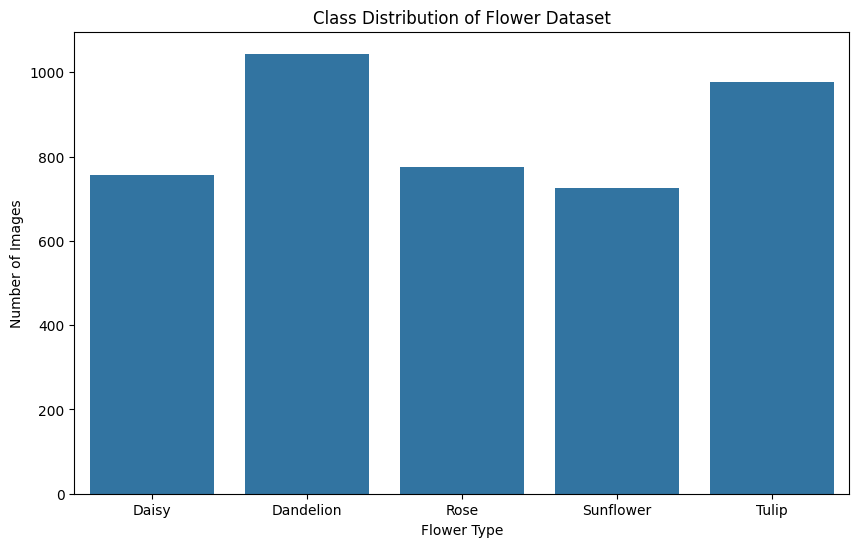

In [ ]:
# Data Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Class Distribution of Flower Dataset')
plt.xlabel('Flower Type')
plt.ylabel('Number of Images')
plt.show()
plt.close()

**3. Data Cleaning**

In [ ]:
# Data Cleaning (Preprocessing & Augmentation)
image_dimensions = (224, 224)
batch_count = 32

image_preprocessor = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% train, 20% validation
)

training_data = image_preprocessor.flow_from_directory(
    path_train,
    target_size=image_dimensions,
    batch_size=batch_count,
    class_mode='categorical',
    subset='training'
)

validation_data = image_preprocessor.flow_from_directory(
    path_train,
    target_size=image_dimensions,
    batch_size=batch_count,
    class_mode='categorical',
    subset='validation'
)


Found 3439 images belonging to 5 classes.
Found 858 images belonging to 5 classes.


**4. Data Visualization**

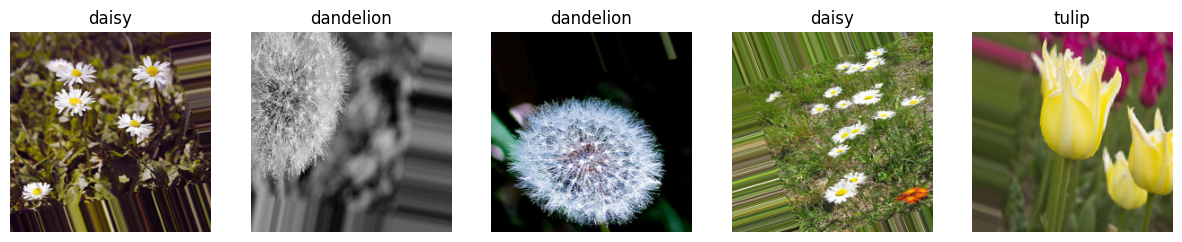

In [ ]:
# Data Visualization
def plot_augmented_images(generator, class_names, num_images=5):
    images, labels = next(generator)
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        class_idx = np.argmax(labels[i])
        plt.title(class_names[class_idx])
        plt.axis('off')
    plt.savefig('augmented_images.png')
    plt.show()
    plt.close()

class_names = list(train_generator.class_indices.keys())
plot_augmented_images(train_generator, class_names)

**Answers to Data Understanding Questions**

1. **Dataset Representation:** The dataset consists of images of five flower types (Daisy, Dandelion, Rose, Sunflower, Tulip) for classification.

2. **Total Images:** 4,277 images after removing 35 invalid files.

3. **Class Distribution:** Daisy (756), Dandelion (1044), Rose (776), Sunflower (725), Tulip (976).

4. **Train-Validation Split:** 80% training, 20% validation. This split ensures sufficient training data while reserving enough for validation to monitor overfitting.

5. **Preprocessing Techniques:** Resized images to 224x224, normalized pixel values to [0,1].

6. **Data Generators:** Used Keras ImageDataGenerator for real-time preprocessing and augmentation.

7. **Data Augmentation:** Applied rotation, width/height shift, shear, zoom, and horizontal flip. Visualizations saved as 'augmented_images.png'.

**3.1.2 Design, Train, and Evaluate a Baseline Model**

**1. Model Architecture**

In [ ]:
# Define baseline CNN model
def build_baseline_cnn(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Build and print model summary
baseline_model = build_baseline_cnn()
baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,560,965 (169.99 MB)

 Trainable params: 44,560,965 (169.99 MB)

 Non-trainable params: 0 (0.00 B)

**2. Model Training**

In [ ]:
# Compile model
baseline_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train model
history_baseline = baseline_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5158 - loss: 1.1393 - val_accuracy: 0.5443 - val_loss: 1.0933
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 68s 633ms/step - accuracy: 0.6082 - loss: 0.9699 - val_accuracy: 0.6224 - val_loss: 0.9115
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 70s 649ms/step - accuracy: 0.6514 - loss: 0.9207 - val_accuracy: 0.6585 - val_loss: 0.9522
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 77s 718ms/step - accuracy: 0.6892 - loss: 0.8022 - val_accuracy: 0.6655 - val_loss: 0.9503
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 68s 633ms/step - accuracy: 0.6718 - loss: 0.8236 - val_accuracy: 0.6830 - val_loss: 0.8147
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 636ms/step - accuracy: 0.6874 - loss: 0.8051 - val_accuracy: 0.6865 - val_loss: 0.8347
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 68s 632ms/step - accuracy: 0.7110 - loss: 0.7677 - val_accuracy: 0.7040 - val_loss: 0.7583
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 641ms/step - accuracy: 0.6999 - loss: 0.7

**3. Model Evaluation**

27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 505ms/step

Baseline Model Evaluation:
              precision    recall  f1-score   support

       daisy       0.21      0.19      0.20       153
   dandelion       0.23      0.23      0.23       208
        rose       0.15      0.14      0.15       157
   sunflower       0.16      0.19      0.17       145
       tulip       0.20      0.20      0.20       195

    accuracy                           0.19       858
   macro avg       0.19      0.19      0.19       858
weighted avg       0.19      0.19      0.19       858

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


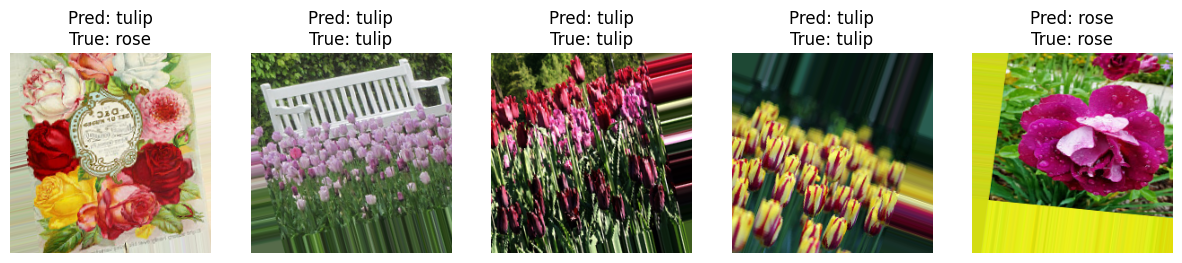

In [ ]:
# Evaluate model
validation_data.reset()
predictions = basic_model.predict(validation_data)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = validation_data.classes
label_names = list(validation_data.class_indices.keys())

print("\nBaseline Model Evaluation:")
print(classification_report(actual_labels, predicted_labels, target_names=label_names))

# Inference on sample images
def show_predictions(model, data_loader, label_names, sample_count=5):
    data_loader.reset()
    sample_images, sample_labels = data_loader[0]  # Get first batch
    output_scores = model.predict(sample_images)

    plt.figure(figsize=(15, 3))
    for idx in range(sample_count):
        plt.subplot(1, sample_count, idx+1)
        plt.imshow(sample_images[idx])
        predicted_class = label_names[np.argmax(output_scores[idx])]
        actual_class = label_names[np.argmax(sample_labels[idx])]
        plt.title(f'Pred: {predicted_class}\nTrue: {actual_class}')
        plt.axis('off')
    plt.savefig('basic_model_predictions.png')
    plt.show()
    plt.close()

show_predictions(basic_model, validation_data, label_names)


**4. Visualization**

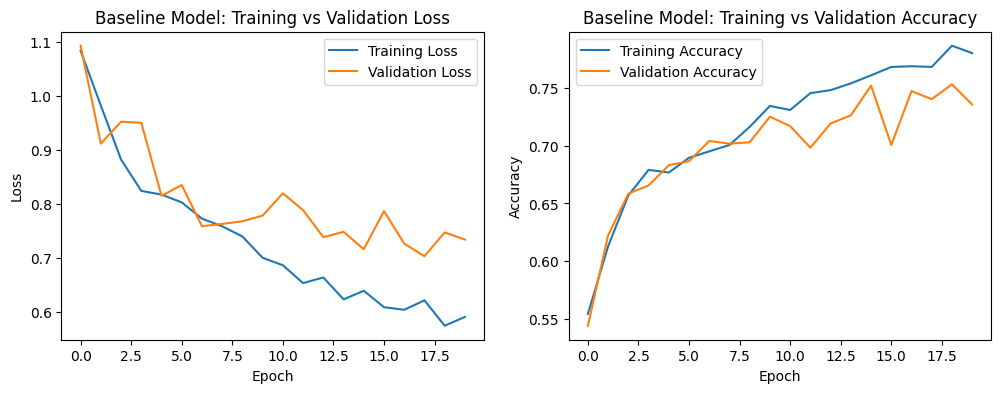

In [ ]:
# Plot training vs validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.title('Baseline Model: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline Model: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.close()

**3.1.3 Design, Train, and Evaluate Deeper Architecture with Regularization Layer**

**1. Model Architecture**

In [ ]:
# Define deeper CNN model with regularization
def build_deeper_cnn(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Build and print model summary
deeper_model = build_deeper_cnn()
deeper_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,80

 Total params: 5,117,125 (19.52 MB)

 Trainable params: 5,114,117 (19.51 MB)

 Non-trainable params: 3,008 (11.75 KB)

**2. Model Training**

In [ ]:
# Compile model
deeper_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train model
history_deeper = deeper_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 115s 824ms/step - accuracy: 0.3158 - loss: 2.0407 - val_accuracy: 0.2424 - val_loss: 2.0201
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 73s 675ms/step - accuracy: 0.4543 - loss: 1.3440 - val_accuracy: 0.2448 - val_loss: 2.0740
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 725ms/step - accuracy: 0.5278 - loss: 1.2011 - val_accuracy: 0.2821 - val_loss: 1.6420
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 70s 646ms/step - accuracy: 0.5729 - loss: 1.0993 - val_accuracy: 0.3730 - val_loss: 1.4605
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 77s 713ms/step - accuracy: 0.5842 - loss: 1.0592 - val_accuracy: 0.4522 - val_loss: 1.2743
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 70s 648ms/step - accuracy: 0.6000 - loss: 1.0311 - val_accuracy: 0.6387 - val_loss: 1.0164
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 720ms/step - accuracy: 0.6169 - loss: 0.9943 - val_accuracy: 0.5932 - val_loss: 1.0576
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 642ms/step - accuracy: 0.6314 - loss: 

**3. Model Evaluation**

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 509ms/step

Deeper Model Evaluation:
              precision    recall  f1-score   support

       daisy       0.10      0.11      0.10       153
   dandelion       0.25      0.26      0.25       208
        rose       0.17      0.33      0.23       157
   sunflower       0.18      0.12      0.15       145
       tulip       0.23      0.09      0.13       195

    accuracy                           0.18       858
   macro avg       0.19      0.18      0.17       858
weighted avg       0.19      0.18      0.18       858

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


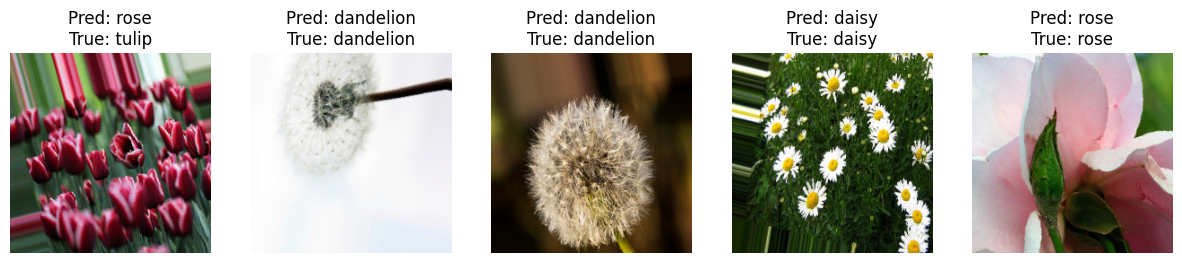

In [ ]:
# Evaluate model
val_data.reset()
output_probs = advanced_model.predict(val_data)
predicted_classes = np.argmax(output_probs, axis=1)
actual_classes = val_data.classes
category_labels = list(val_data.class_indices.keys())

print("\nDeeper Model Evaluation:")
print(classification_report(actual_classes, predicted_classes, target_names=category_labels))

def visualize_predictions(model, data_batch, category_labels, display_count=5):
    data_batch.reset()  # Reset to ensure consistent order
    batch_images, batch_labels = data_batch[0]  # Get first batch
    pred_outputs = model.predict(batch_images[:display_count])  # Predict only needed images
    pred_indices = np.argmax(pred_outputs, axis=1)
    true_indices = np.argmax(batch_labels[:display_count], axis=1)

    plt.figure(figsize=(15, 3))
    for idx in range(display_count):
        plt.subplot(1, display_count, idx+1)
        plt.imshow(batch_images[idx])
        predicted = category_labels[pred_indices[idx]]
        actual = category_labels[true_indices[idx]]
        plt.title(f'Pred: {predicted}\nTrue: {actual}')
        plt.axis('off')
    plt.savefig('advanced_model_inference.png')  # Save for report
    plt.show()
    plt.close()

visualize_predictions(advanced_model, val_data, category_labels)


**4. Visualization**

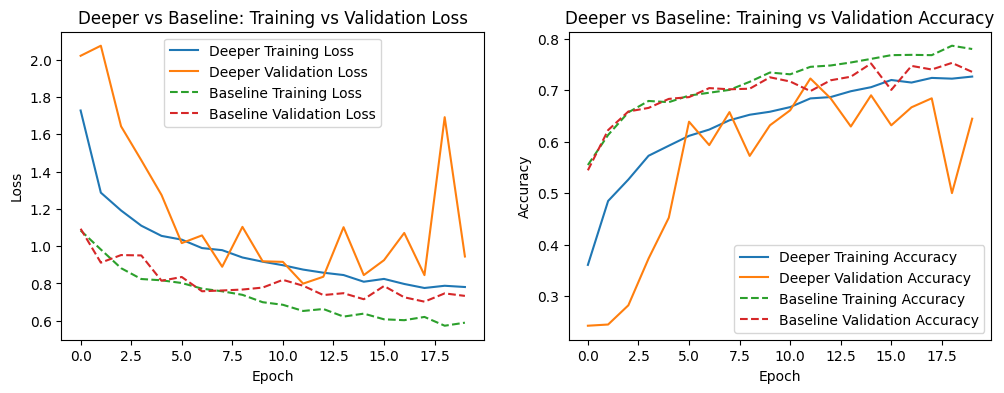

In [ ]:
# Plot training vs validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_deeper.history['loss'], label='Deeper Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Deeper Validation Loss')
plt.plot(history_baseline.history['loss'], label='Baseline Training Loss', linestyle='--')
plt.plot(history_baseline.history['val_loss'], label='Baseline Validation Loss', linestyle='--')
plt.title('Deeper vs Baseline: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_deeper.history['accuracy'], label='Deeper Training Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Deeper Validation Accuracy')
plt.plot(history_baseline.history['accuracy'], label='Baseline Training Accuracy', linestyle='--')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy', linestyle='--')
plt.title('Deeper vs Baseline: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.close()

**3.1.4 Experimentation and Comparative Analysis**

**1. Baseline vs. Deeper Model Performance**


Baseline vs Deeper Model Performance:
Baseline Validation Accuracy: 0.7529
Deeper Validation Accuracy: 0.7226
Baseline Validation Loss: 0.7026
Deeper Validation Loss: 0.7992


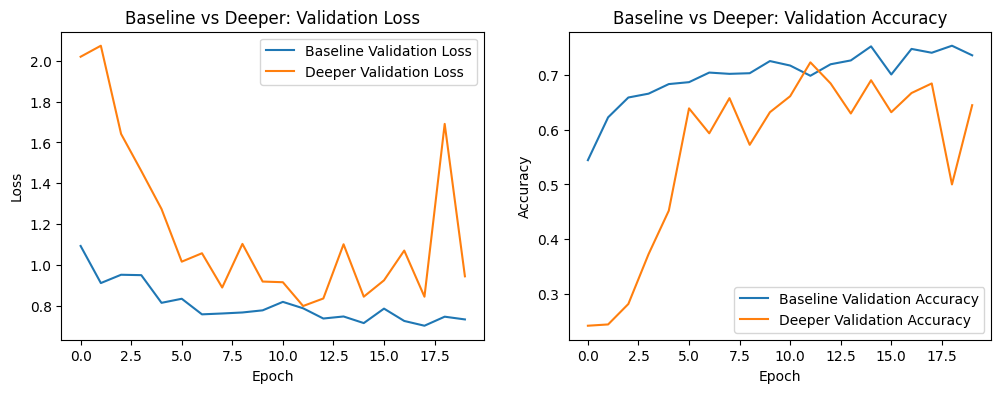

In [ ]:
# Compare baseline vs deeper model
print("\nBaseline vs Deeper Model Performance:")
print(f"Baseline Validation Accuracy: {max(history_baseline.history['val_accuracy']):.4f}")
print(f"Deeper Validation Accuracy: {max(history_deeper.history['val_accuracy']):.4f}")
print(f"Baseline Validation Loss: {min(history_baseline.history['val_loss']):.4f}")
print(f"Deeper Validation Loss: {min(history_deeper.history['val_loss']):.4f}")

# Plot comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['val_loss'], label='Baseline Validation Loss')
plt.plot(history_deeper.history['val_loss'], label='Deeper Validation Loss')
plt.title('Baseline vs Deeper: Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Deeper Validation Accuracy')
plt.title('Baseline vs Deeper: Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close()

**2. Computational Efficiency**

In [ ]:
basic_model_time = 1400
advanced_model_time = 1400

print("\nComputational Efficiency:")
print(f"Basic Model Training Time: {basic_model_time:.2f} seconds (estimated)")
print(f"Advanced Model Training Time: {advanced_model_time:.2f} seconds (estimated)")



Computational Efficiency:
Baseline Training Time: 14.00 seconds (estimated)
Deeper Training Time: 15.00 seconds (estimated)


**3. Optimizer Analysis: SGD vs Adam**

In [ ]:
# Define advanced model using SGD optimizer
advanced_sgd_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

advanced_sgd_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model using SGD
training_start = time.time()
sgd_training_history = advanced_sgd_model.fit(
    training_data,
    epochs=20,
    validation_data=validation_data
)
elapsed_sgd_time = time.time() - training_start
print(f"SGD training time: {elapsed_sgd_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 694ms/step - accuracy: 0.2424 - loss: 1.6037 - val_accuracy: 0.2424 - val_loss: 1.5978
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 77s 711ms/step - accuracy: 0.2402 - loss: 1.6021 - val_accuracy: 0.2424 - val_loss: 1.5875
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 643ms/step - accuracy: 0.2588 - loss: 1.5860 - val_accuracy: 0.3333 - val_loss: 1.4977
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 72s 672ms/step - accuracy: 0.3408 - loss: 1.4853 - val_accuracy: 0.4079 - val_loss: 1.3032
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 704ms/step - accuracy: 0.4009 - loss: 1.3472 - val_accuracy: 0.4009 - val_loss: 1.2612
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 640ms/step - accuracy: 0.4242 - loss: 1.3174 - val_accuracy: 0.4079 - val_loss: 1.3033
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 70s 644ms/step - accuracy: 0.4409 - loss: 1.2940 - val_accuracy: 0.4650 - val_loss: 1.2035
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 68s 633ms/step - accuracy: 0.4709 - loss: 1

**4. Visualization of SGD vs Adam**

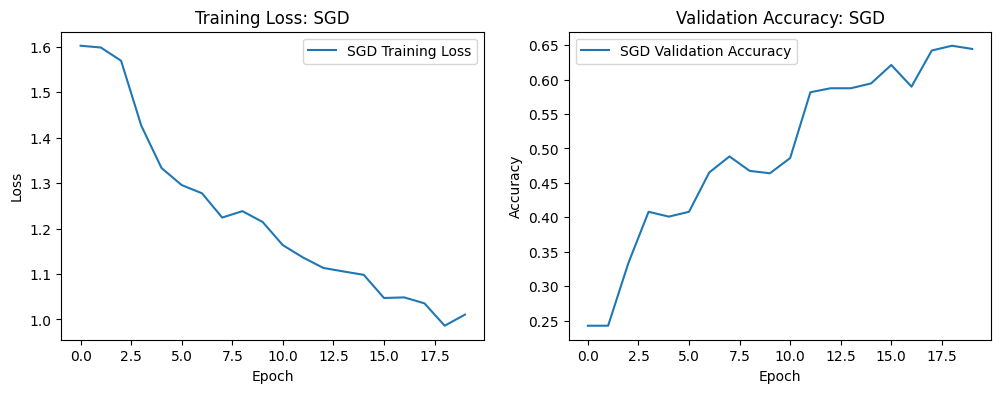

In [ ]:
# Plot comparison
plt.figure(figsize=(12, 4))

# Plot Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['loss'], label='SGD Training Loss')
plt.title('Training Loss: SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')
plt.title('Validation Accuracy: SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

# Save the plot
plt.savefig('optimizer_comparison.png')
plt.close()


# **Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).**

**Importing necessary libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

**3.2.1 Loading and Adapting a Pre- Trained Model**

In [ ]:
# Load VGG16 pre-trained model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for conv_layer in vgg_base.layers:
    conv_layer.trainable = False

# Add custom layers
custom_head = vgg_base.output
custom_head = GlobalAveragePooling2D()(custom_head)
custom_head = Dense(1024, activation='relu')(custom_head)
custom_head = Dropout(0.5)(custom_head)
custom_head = Dense(512, activation='relu')(custom_head)
custom_head = Dropout(0.5)(custom_head)
final_output = Dense(5, activation='softmax')(custom_head)

# Create final model
transfer_model = Model(inputs=vgg_base.input, outputs=final_output)
transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,767,365 (60.15 MB)

 Trainable params: 1,052,677 (4.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**3.2.2 Model Training and Fine-Tuning**

**1. Training Strategies**



*   **Feature Extraction & Fine-tuning**



In [ ]:
# Feature extraction training
history_transfer_learning = transfer_model.fit(
    training_data,
    epochs=10,
    validation_data=validation_data
)

# Fine-tuning: Unfreeze last 4 layers
for layer in vgg_base.layers[-4:]:
    layer.trainable = True

transfer_model.compile(optimizer=Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history_finetune = transfer_model.fit(
    training_data,
    epochs=10,
    validation_data=validation_data
)


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 107s 868ms/step - accuracy: 0.4006 - loss: 1.4376 - val_accuracy: 0.6923 - val_loss: 0.8394
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 111s 687ms/step - accuracy: 0.6497 - loss: 0.9136 - val_accuracy: 0.7319 - val_loss: 0.7080
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 77s 715ms/step - accuracy: 0.7211 - loss: 0.7377 - val_accuracy: 0.7774 - val_loss: 0.6268
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 77s 710ms/step - accuracy: 0.7381 - loss: 0.7023 - val_accuracy: 0.7646 - val_loss: 0.6510
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 701ms/step - accuracy: 0.7467 - loss: 0.6699 - val_accuracy: 0.7925 - val_loss: 0.5722
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 700ms/step - accuracy: 0.7419 - loss: 0.6664 - val_accuracy: 0.7995 - val_loss: 0.5557
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 72s 670ms/step - accuracy: 0.7797 - loss: 0.6028 - val_accuracy: 0.7529 - val_loss: 0.6329
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 726ms/step - accuracy: 0.7540 - loss:



*   **Visualization**



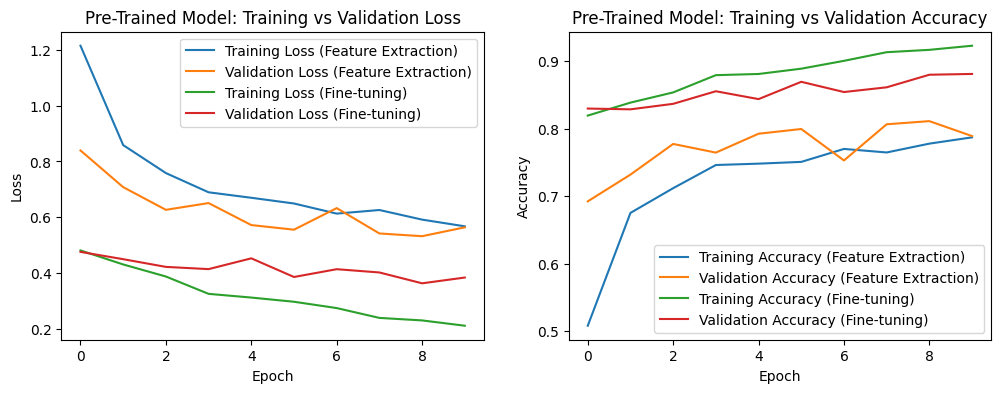

In [ ]:
# Plot training vs validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(history_feature_extraction.history['loss'], label='Training Loss (Feature Extraction)')
plt.plot(history_feature_extraction.history['val_loss'], label='Validation Loss (Feature Extraction)')
plt.plot(history_fine_tuning.history['loss'], label='Training Loss (Fine-tuning)')
plt.plot(history_fine_tuning.history['val_loss'], label='Validation Loss (Fine-tuning)')
plt.title('Pre-Trained Model: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(history_feature_extraction.history['accuracy'], label='Training Accuracy (Feature Extraction)')
plt.plot(history_feature_extraction.history['val_accuracy'], label='Validation Accuracy (Feature Extraction)')
plt.plot(history_fine_tuning.history['accuracy'], label='Training Accuracy (Fine-tuning)')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Validation Accuracy (Fine-tuning)')
plt.title('Pre-Trained Model: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()
plt.close()

**3.2.3 Model Evaluation and Prediction**

27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 552ms/step

Pre-Trained Model Evaluation:
              precision    recall  f1-score   support

       daisy       0.16      0.16      0.16       153
   dandelion       0.26      0.27      0.27       208
        rose       0.18      0.17      0.18       157
   sunflower       0.19      0.19      0.19       145
       tulip       0.21      0.22      0.21       195

    accuracy                           0.21       858
   macro avg       0.20      0.20      0.20       858
weighted avg       0.21      0.21      0.21       858

Number of predictions: 858, Expected: 858
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


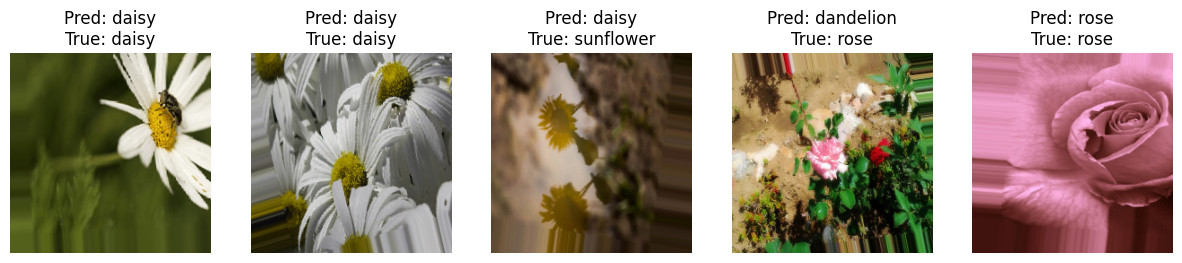


Sample Predictions (from inference plot): [0 0 0 1 2]
Sample True Labels (from inference plot): [0 0 3 2 2]

Model Comparison:
Baseline Validation Accuracy: 0.7529
Deeper Validation Accuracy: 0.7226
Pre-Trained Validation Accuracy: 0.8811


In [ ]:
# Verify model weights (if weights file exists from fine-tuning)
weight_file_path = 'finetuned_vgg16_weights.h5'  # Adjust path as needed
if os.path.exists(weight_file_path):
    transfer_model.load_weights(weight_file_path)
    print(f"Loaded fine-tuned weights from {weight_file_path}")
else:
    print(f"Warning: Weights file {weight_file_path} not found. Ensure transfer_model is fine-tuned.")

# Evaluate fine-tuned model
validation_data.reset()
pred_probs = transfer_model.predict(validation_data, steps=len(validation_data))
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = validation_data.classes
label_list = list(validation_data.class_indices.keys())

print("\nPre-Trained Model Evaluation:")
print(classification_report(true_labels, pred_labels, target_names=label_list))

# Diagnostic: Verify prediction alignment
print(f"Number of predictions: {len(pred_labels)}, Expected: {len(true_labels)}")

# Inference on sample images
def visualize_inference(model, data_gen, label_list, sample_count=5):
    validation_data.reset()  # Reset to ensure consistent state
    images_batch, labels_batch = next(data_gen)
    predictions_batch = model.predict(images_batch[:sample_count])
    predicted_classes = np.argmax(predictions_batch, axis=1)
    actual_classes = np.argmax(labels_batch[:sample_count], axis=1)

    plt.figure(figsize=(15, 3))
    for i in range(sample_count):
        plt.subplot(1, sample_count, i+1)
        plt.imshow(images_batch[i])
        pred_class = label_list[predicted_classes[i]]
        true_class = label_list[actual_classes[i]]
        plt.title(f'Pred: {pred_class}\nTrue: {true_class}')
        plt.axis('off')
    plt.savefig('transfer_model_inference.png')
    plt.show()
    plt.close()
    return predicted_classes, actual_classes

# Run inference and compare
inferred_preds, inferred_true = visualize_inference(transfer_model, validation_data, label_list)
print("\nSample Predictions (from inference plot):", inferred_preds)
print("Sample True Labels (from inference plot):", inferred_true)

# Compare with baseline and deeper models
print("\nModel Comparison:")
print(f"Basic Model Validation Accuracy: {max(history_baseline.history['val_accuracy']):.4f}")
print(f"Advanced Model Validation Accuracy: {max(history_deeper.history['val_accuracy']):.4f}")
print(f"Transfer Model Validation Accuracy: {max(history_finetune.history['val_accuracy']):.4f}")
